In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/subpopulations/TNKILC/final/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

FIG2SAVE = DIR2SAVE.joinpath("figures/after_20mt_sam_annot_merge/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [3]:
adata = sc.read_h5ad(
    DIR2SAVE.joinpath("SMC_KUL_Pelka_Che_Wu_CRC_integrated_scvi_hvg_TNKILC_final.h5ad")
)
adata.shape

(94164, 2000)

In [4]:
# looad all data to filer oonly barcodes 20mt final
adata_all = sc.read_h5ad("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/SMC_KUL_Pelka_Che_Wu_pCRC_annotations.h5ad")

In [5]:
barcodes2keep = adata_all[adata_all.obs.Annotation_scVI=="T-NK-ILC"].obs.index
len(barcodes2keep)

94119

In [6]:
# select only barcodees that are in final object (20mt sam + my TME)
adata = adata[adata.obs.index.isin(barcodes2keep)].copy()
adata.shape

(94119, 2000)

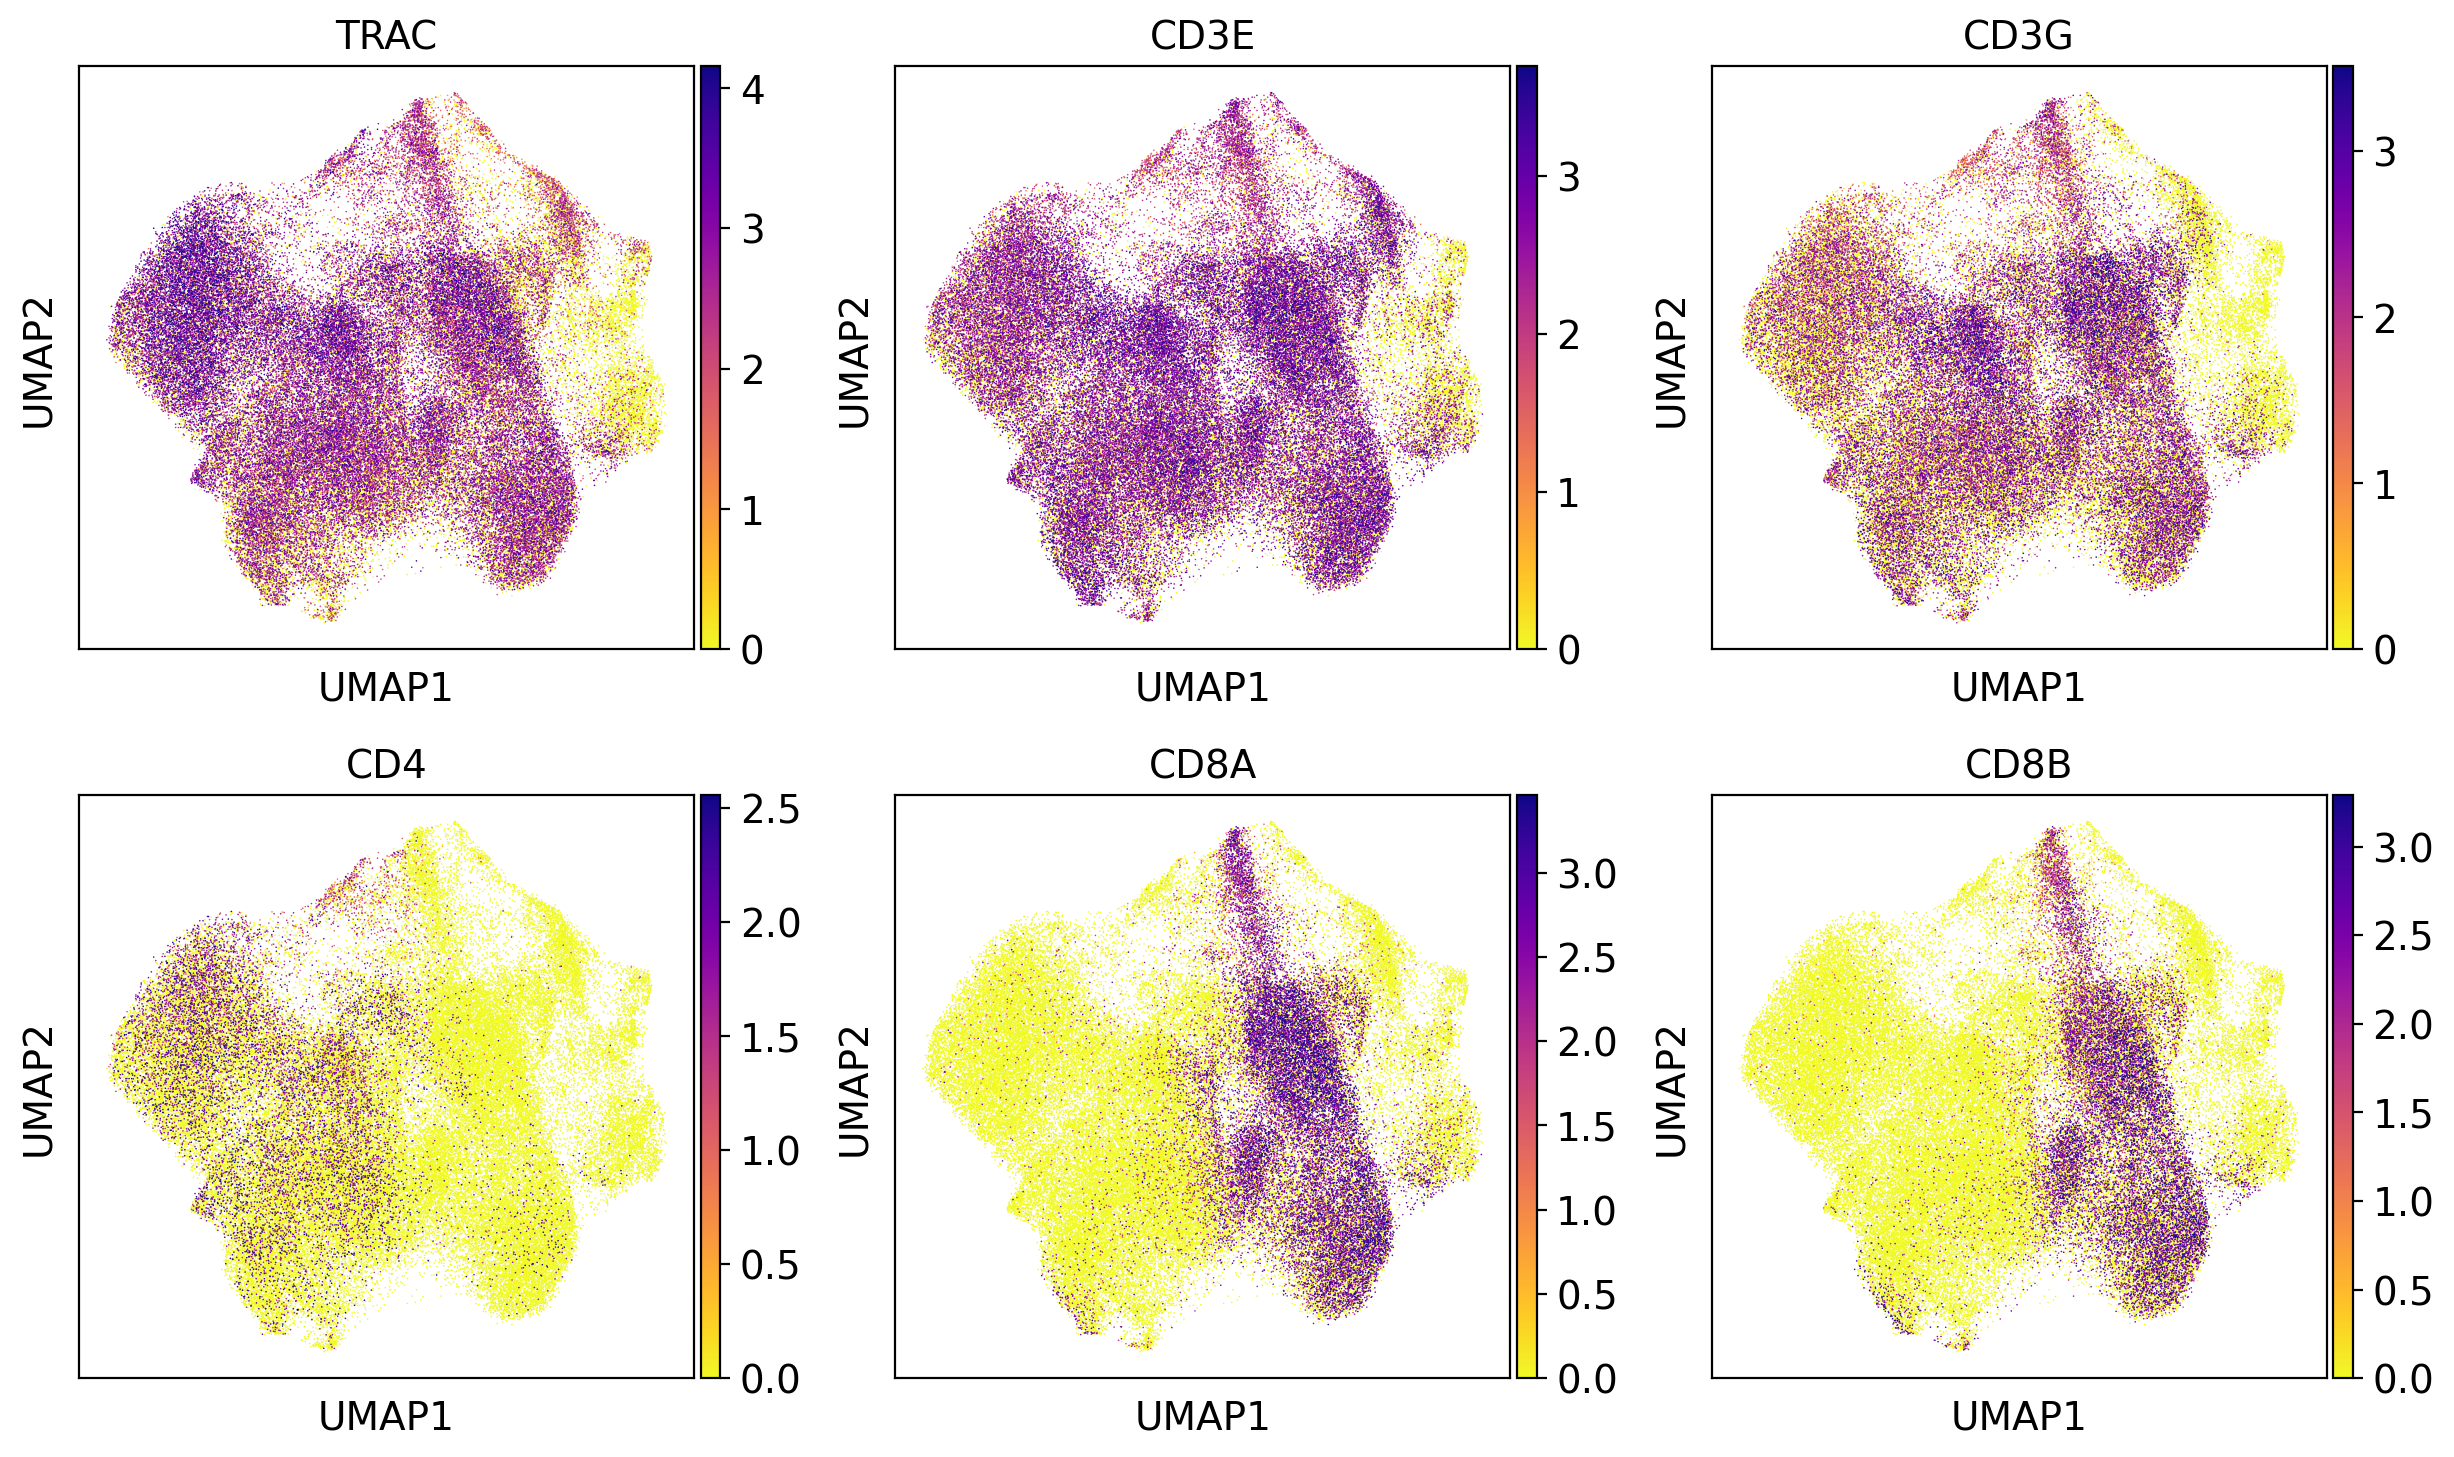

In [8]:
sc.pl.umap(
    adata,
    color=['TRAC', 'CD3E', 'CD3G', 'CD4', 'CD8A', 'CD8B', ],
    ncols=3,
    use_raw=True,
    vmin=0,
    vmax="p99",
    color_map="plasma_r",  #'RdPu',
    save="general_markers_cd3.pdf",
    show=True,
) 


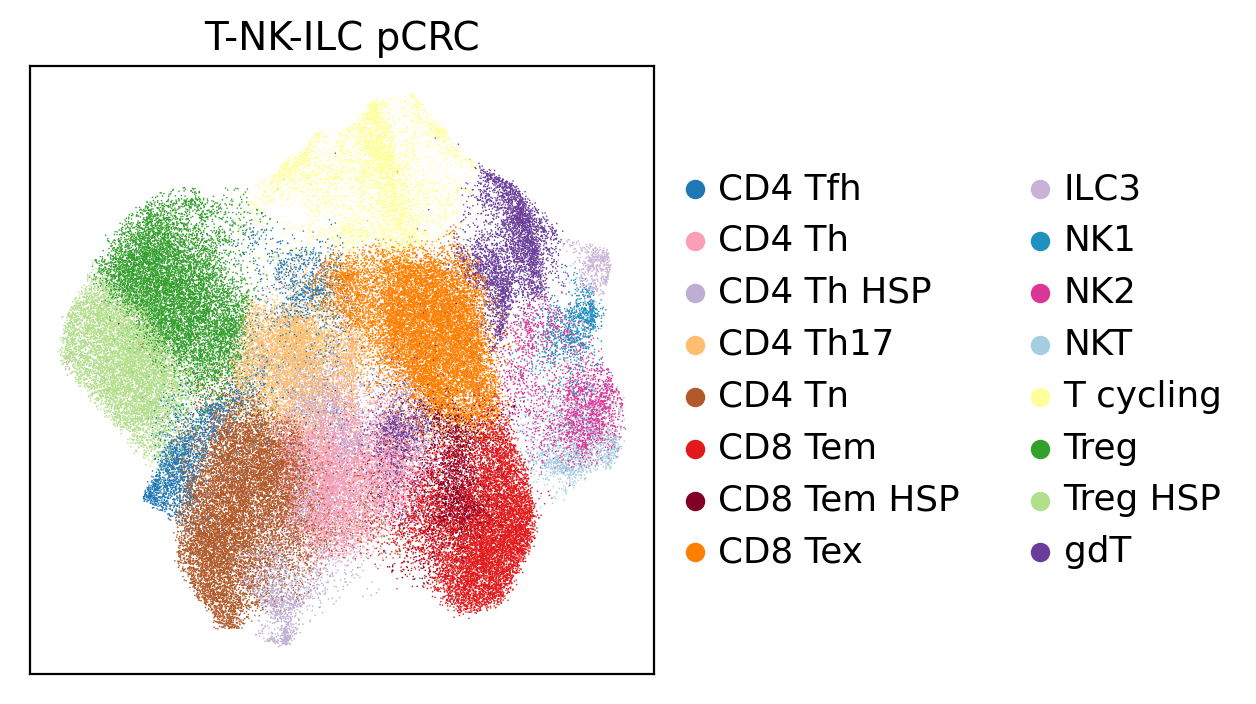

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sc.pl.umap(
    adata,
    color="Annotation_scVI_detailed",
    show=False,
    legend_loc="right margin",
    title="T-NK-ILC pCRC",
    ax=ax,
)
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig(FIG2SAVE.joinpath("Annotation.pdf"), bbox_inches='tight', dpi=DPI)

In [8]:
def plot_patch(labels, colors):
    patches = []
    for i in colors:
        (patch,) = plt.plot(
            [],
            "s",
            c=i,
            markeredgewidth=3,
            markersize=7.5,
        )
        patches.append(patch)
    plt.legend(patches, labels, frameon=False)

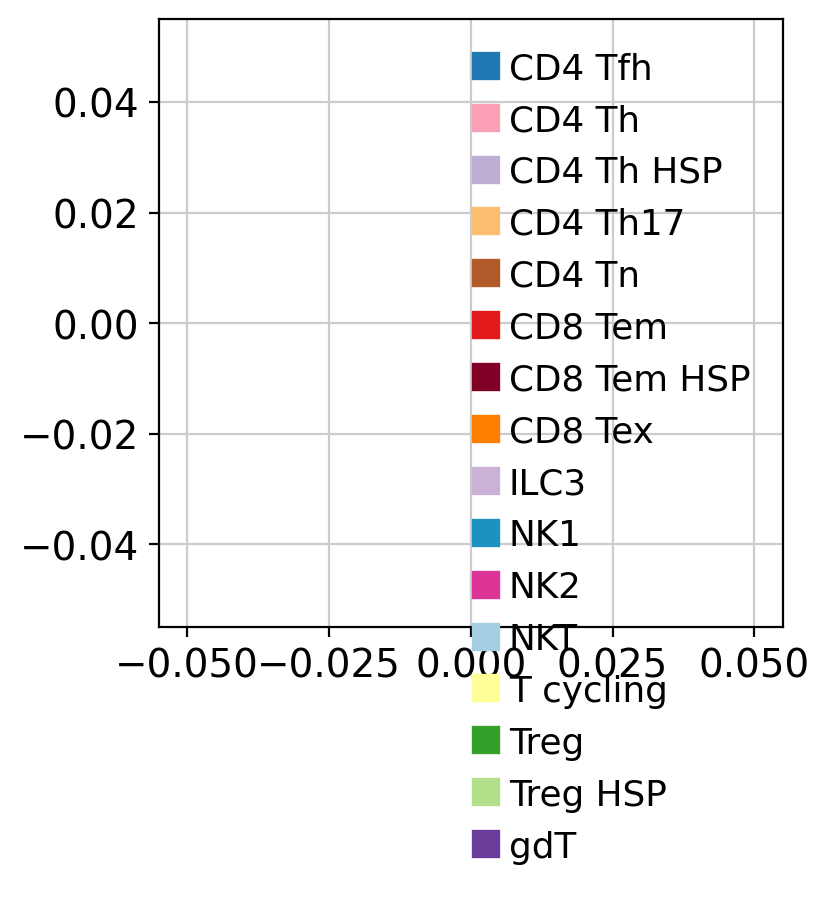

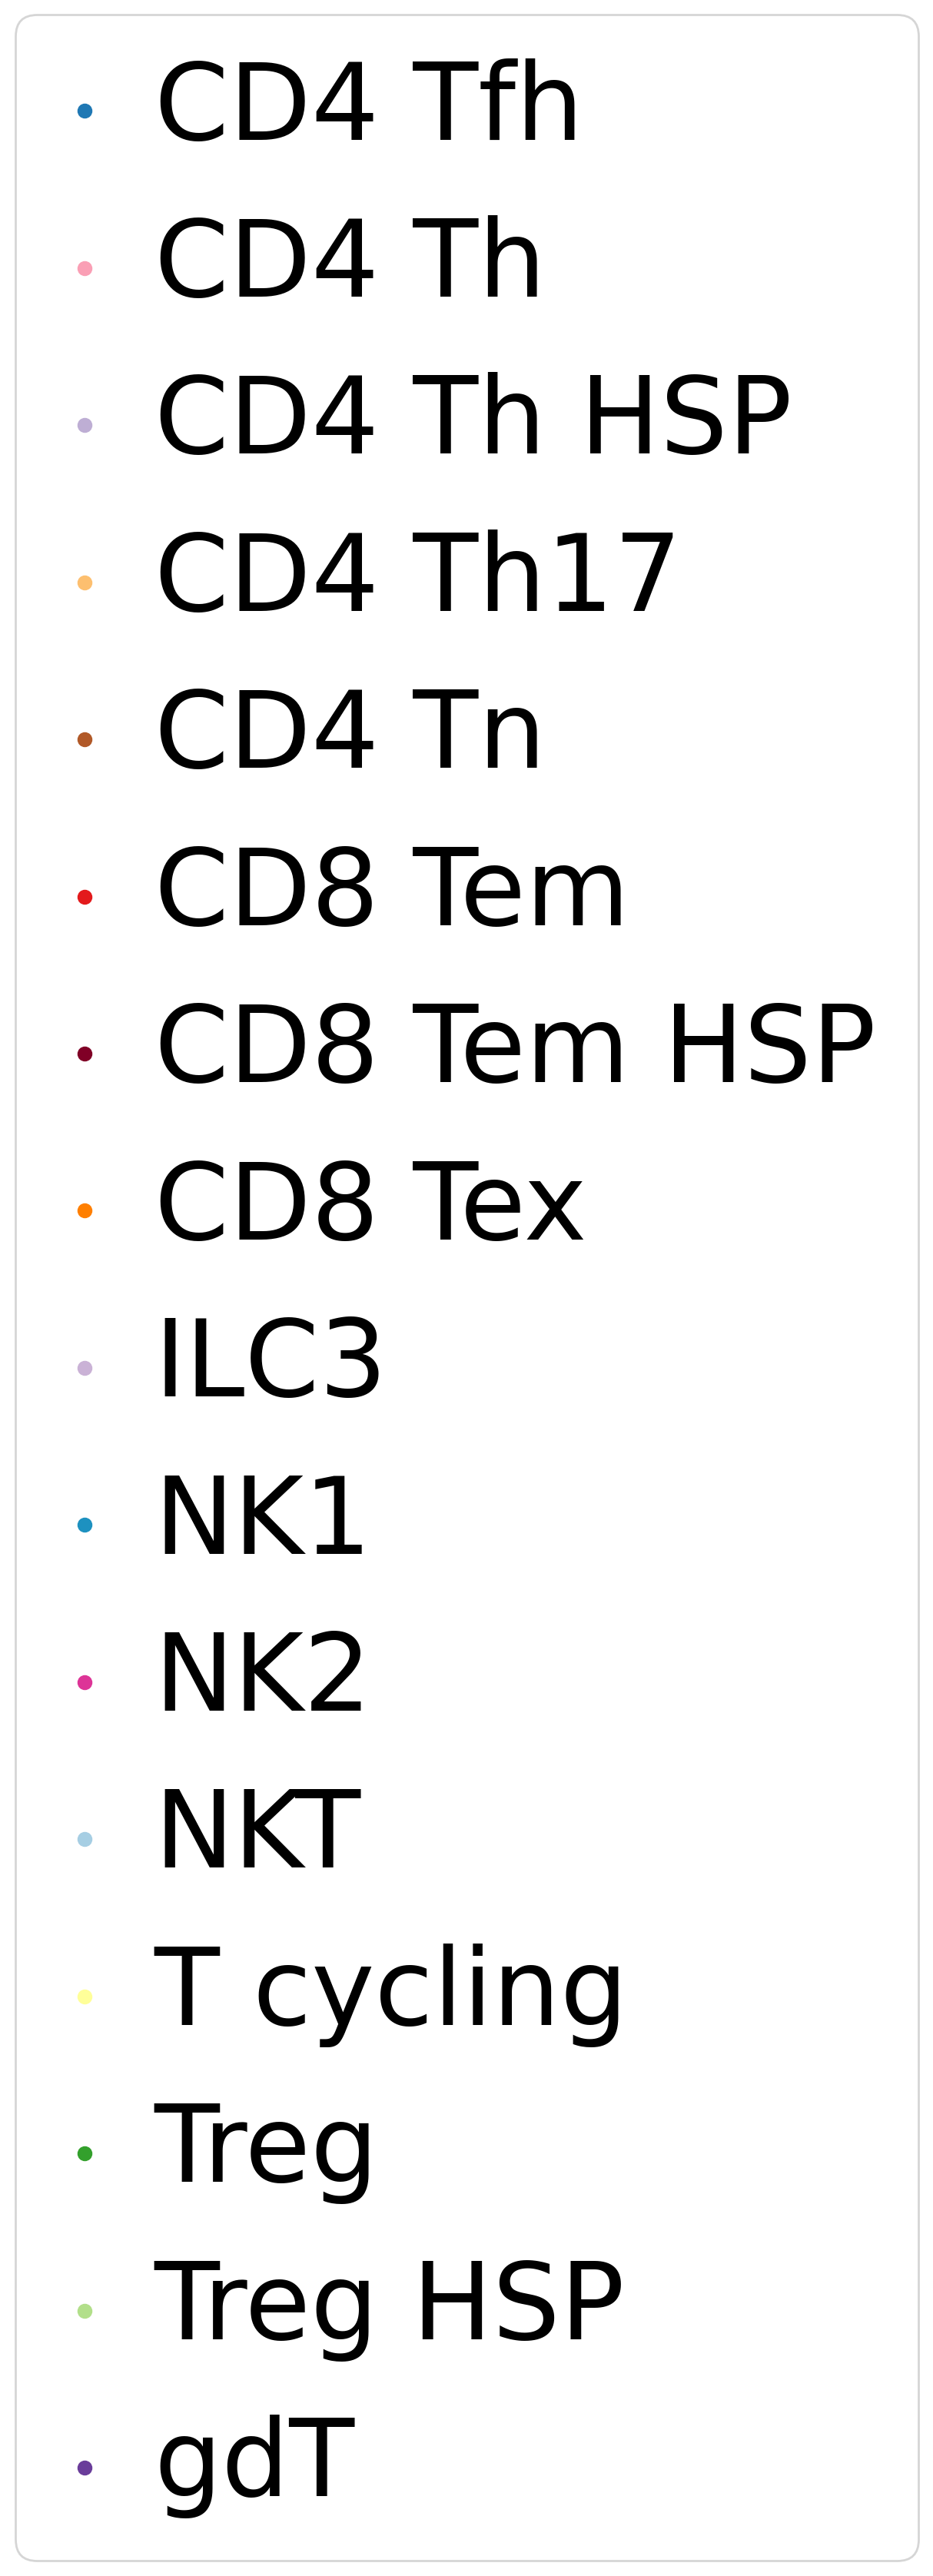

In [9]:
legend_colors = adata.uns["Annotation_scVI_detailed_colors"] #color_dict.values()
legend_labels = adata.obs.Annotation_scVI_detailed.cat.categories #color_dict.keys()
plot_patch(legend_labels, legend_colors)
plt.savefig(FIG2SAVE.joinpath('legend.pdf'), bbox_inches='tight', dpi=DPI)

# get handles and labels for reuse
label_params = ax.get_legend_handles_labels() 

figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":50})



In [10]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/subpopulations/TNKILC/final/figures/after_20mt_sam_annot_merge')

### proportions across datasetts

In [11]:
from matplotlib.patches import Rectangle


def proportion_cells_patient(
    adata, groupby_labels, xlabel: str, ylabel: str, colors: dict, figname: str, bbox_to_anchor=(1, 0.8)
):  # colors
    # compute proportion of cells within each group
    table2plot = (
        adata.reset_index()
        .groupby(groupby_labels)
        .size()
        .groupby(level=0)
        .apply(lambda x: x * 100 / x.sum())
        .unstack()
    )

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        sharey=False,
        sharex=False,
        dpi=DPI,
    )  # figsize=(4, 4))

    print(table2plot)
    table2plot.plot.barh(stacked=True, ax=ax, color=colors.values())  # , color=colors
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid(False, which="major", axis="both")  # removes major horizontal gridlinesd

    labels = list(colors.keys())
    l = [Rectangle((0, 0), 0, 0, color=color) for color in list(colors.values())]
    ax.legend(
        l,
        labels,
        loc="upper left",
        bbox_to_anchor=bbox_to_anchor, #(1, 0.8),
        facecolor="white",
        edgecolor="white",
        ncol=1,
        borderaxespad=0.0,
        framealpha=0,
        frameon=False,
    )

    plt.savefig(FIG2SAVE.joinpath(figname), dpi=DPI, format="pdf", bbox_inches="tight")
    plt.show()

cell_source                     SMC       KUL      Pelka        Che         Wu
Annotation_scVI_detailed                                                      
CD4 Tfh                   13.923321  2.969155  39.694436  30.152782  13.260306
CD4 Th                     9.119233  3.271420  45.200719  28.208508  14.200120
CD4 Th HSP                23.565290  0.110895   7.346826  10.479623  58.497366
CD4 Th17                  26.337115  1.539708  42.512156  13.225284  16.385737
CD4 Tn                    23.223597  2.591641  25.208187  25.620671  23.355903
CD8 Tem                   18.789872  2.492026  17.992424  44.298246  16.427432
CD8 Tem HSP               25.411969  0.910668  30.095403  16.261925  27.320035
CD8 Tex                   14.002317  0.767449  67.130032  12.720822   5.379380
ILC3                      15.811966  2.564103  55.341880  19.658120   6.623932
NK1                       19.871205  2.299908  44.066237  26.310948   7.451702
NK2                       16.514085  0.563380  33.52

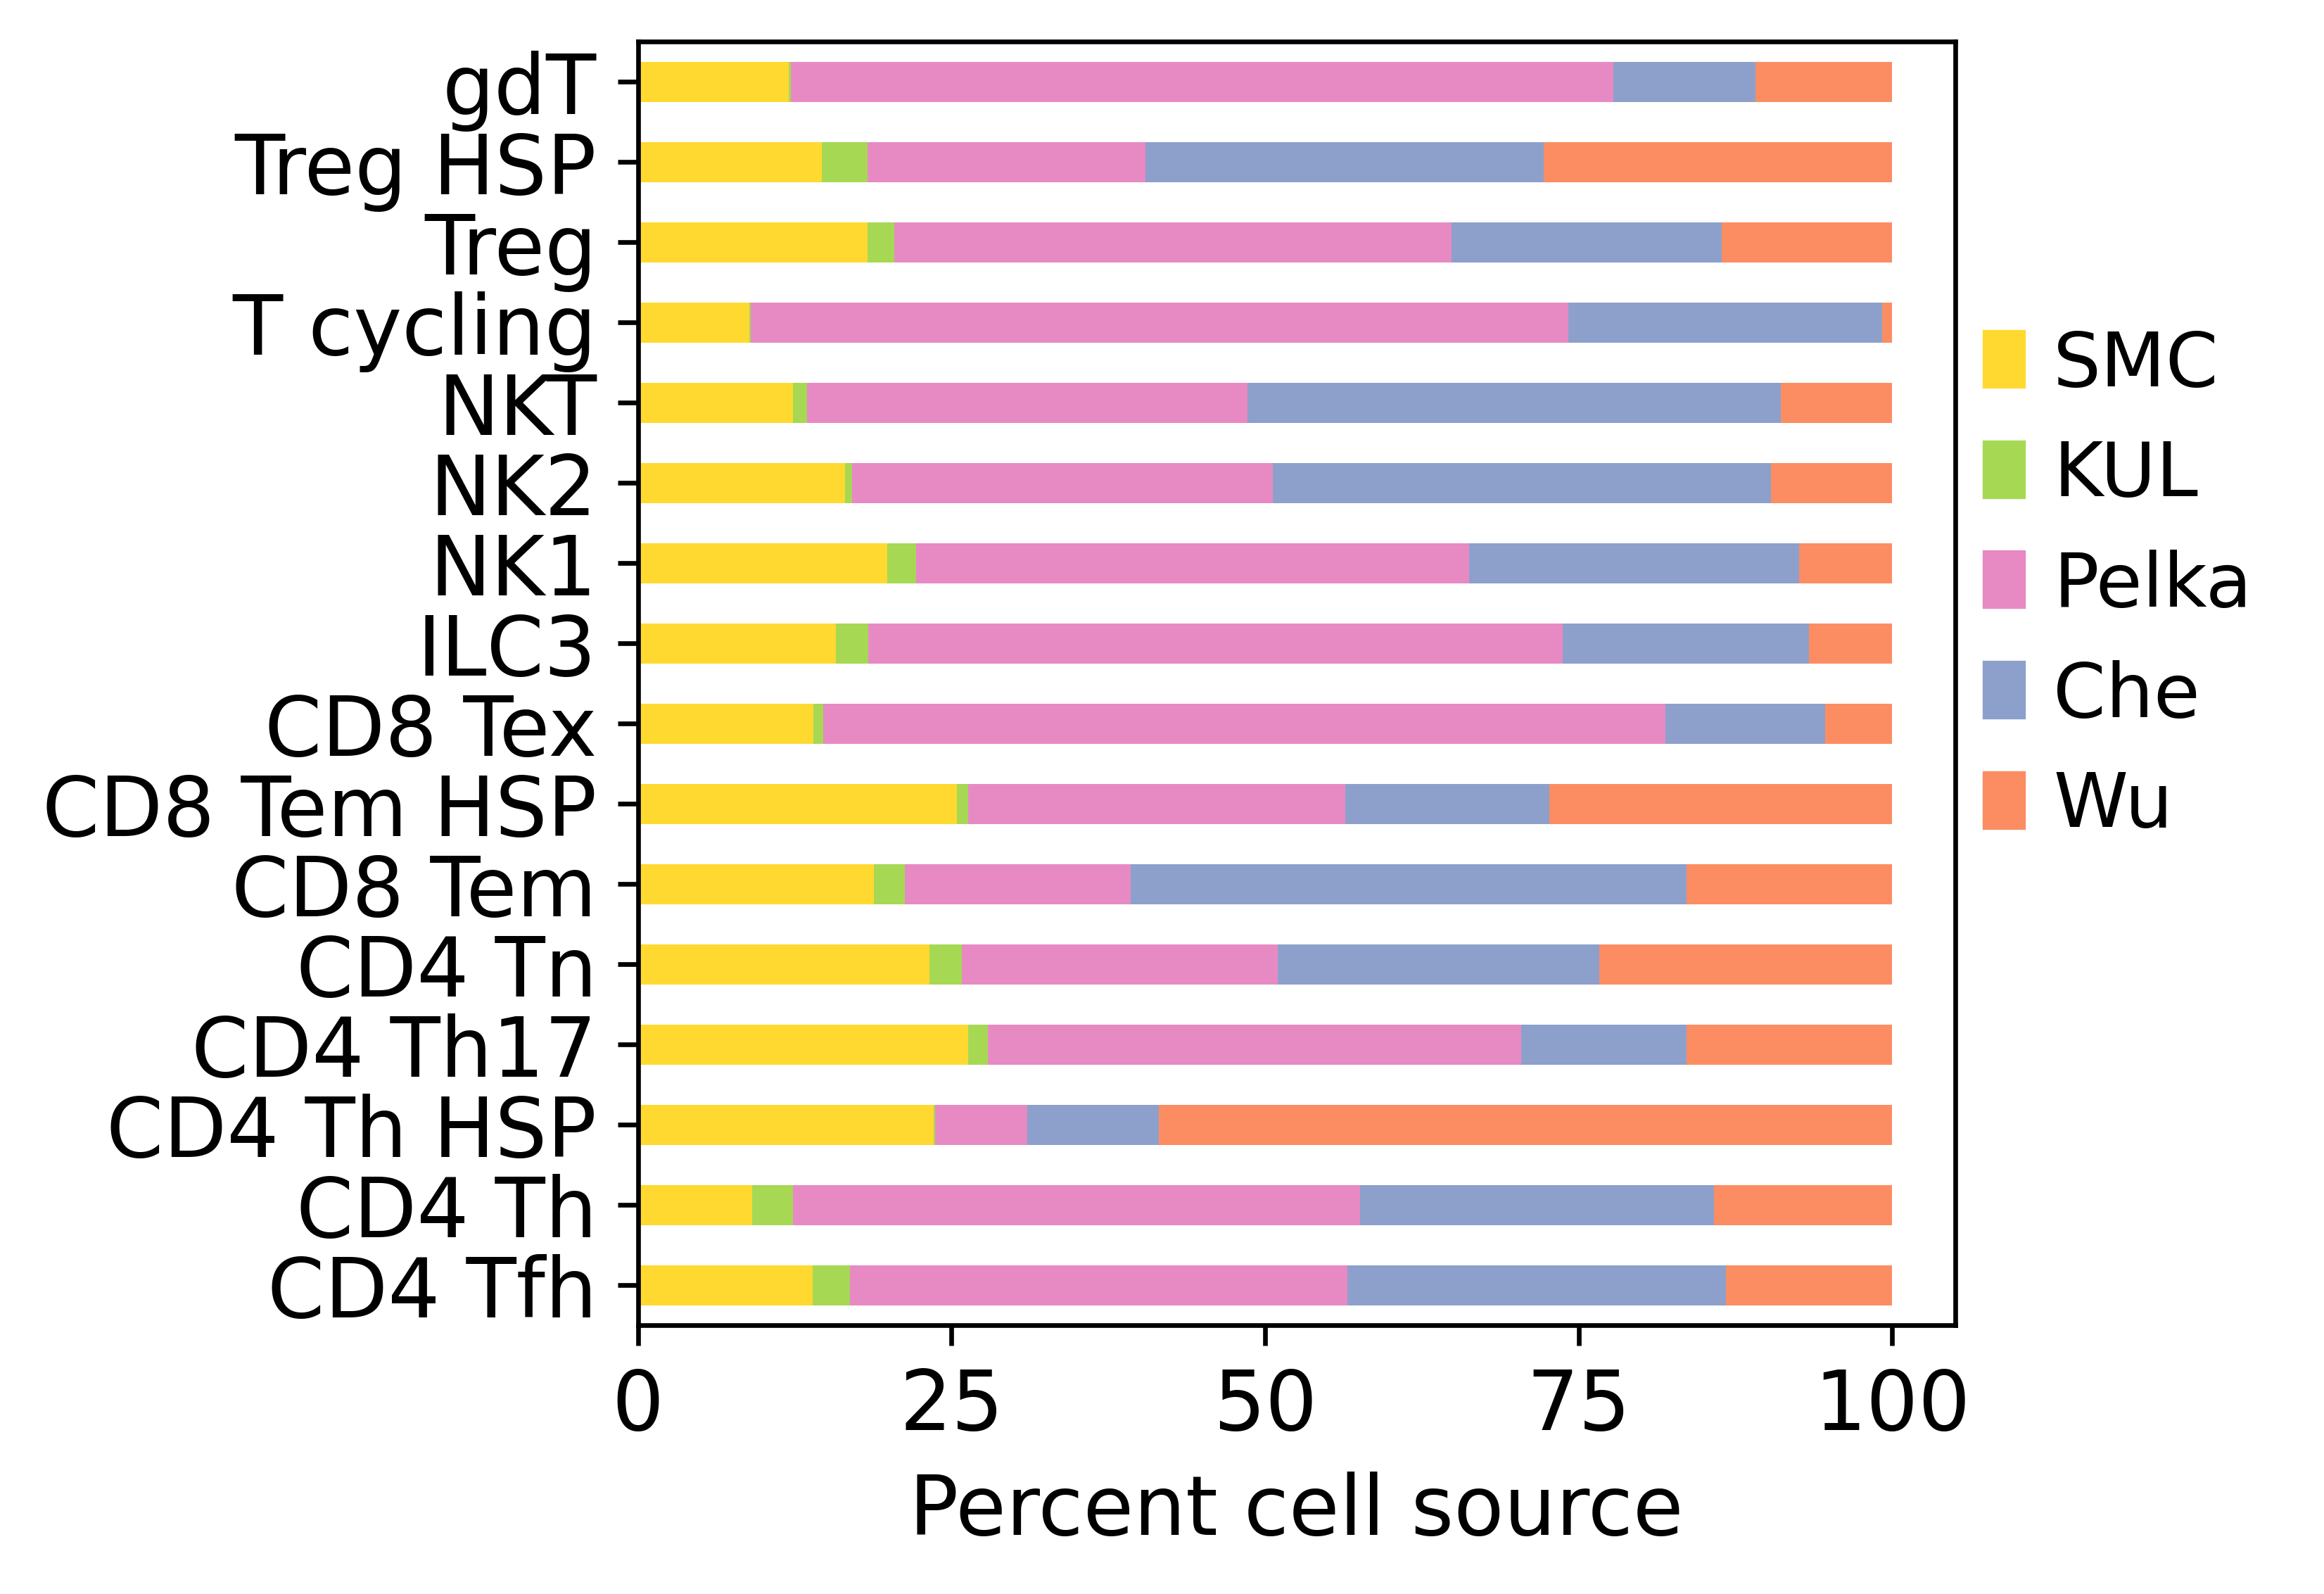

In [12]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["cell_source"].cat.categories.values.tolist(),
        adata.uns["cell_source_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["Annotation_scVI_detailed", "cell_source"],
    xlabel="Percent cell source",
    ylabel="",
    colors=color_dict,
    figname="annotation_cell_source.pdf",
)

Annotation_scVI_detailed   CD4 Tfh     CD4 Th  CD4 Th HSP   CD4 Th17  \
cell_source                                                            
SMC                       3.013664   4.748237    5.303550  10.139140   
KUL                       5.845630  15.493757    0.227015   5.391600   
Pelka                     3.628937   9.940704    0.698379   6.912637   
Che                       4.545652  10.229890    1.642693   3.546130   
Wu                        2.992065   7.707818   13.724470   6.576037   

Annotation_scVI_detailed     CD4 Tn    CD8 Tem  CD8 Tem HSP    CD8 Tex  \
cell_source                                                              
SMC                       18.618581  11.761403     3.656330  12.067137   
KUL                       18.898978  14.188422     1.191827   6.015891   
Pelka                      8.536039   4.756885     1.828963  24.435367   
Che                       14.306201  19.312503     1.629655   7.635479   
Wu                        19.519969  10.719396     

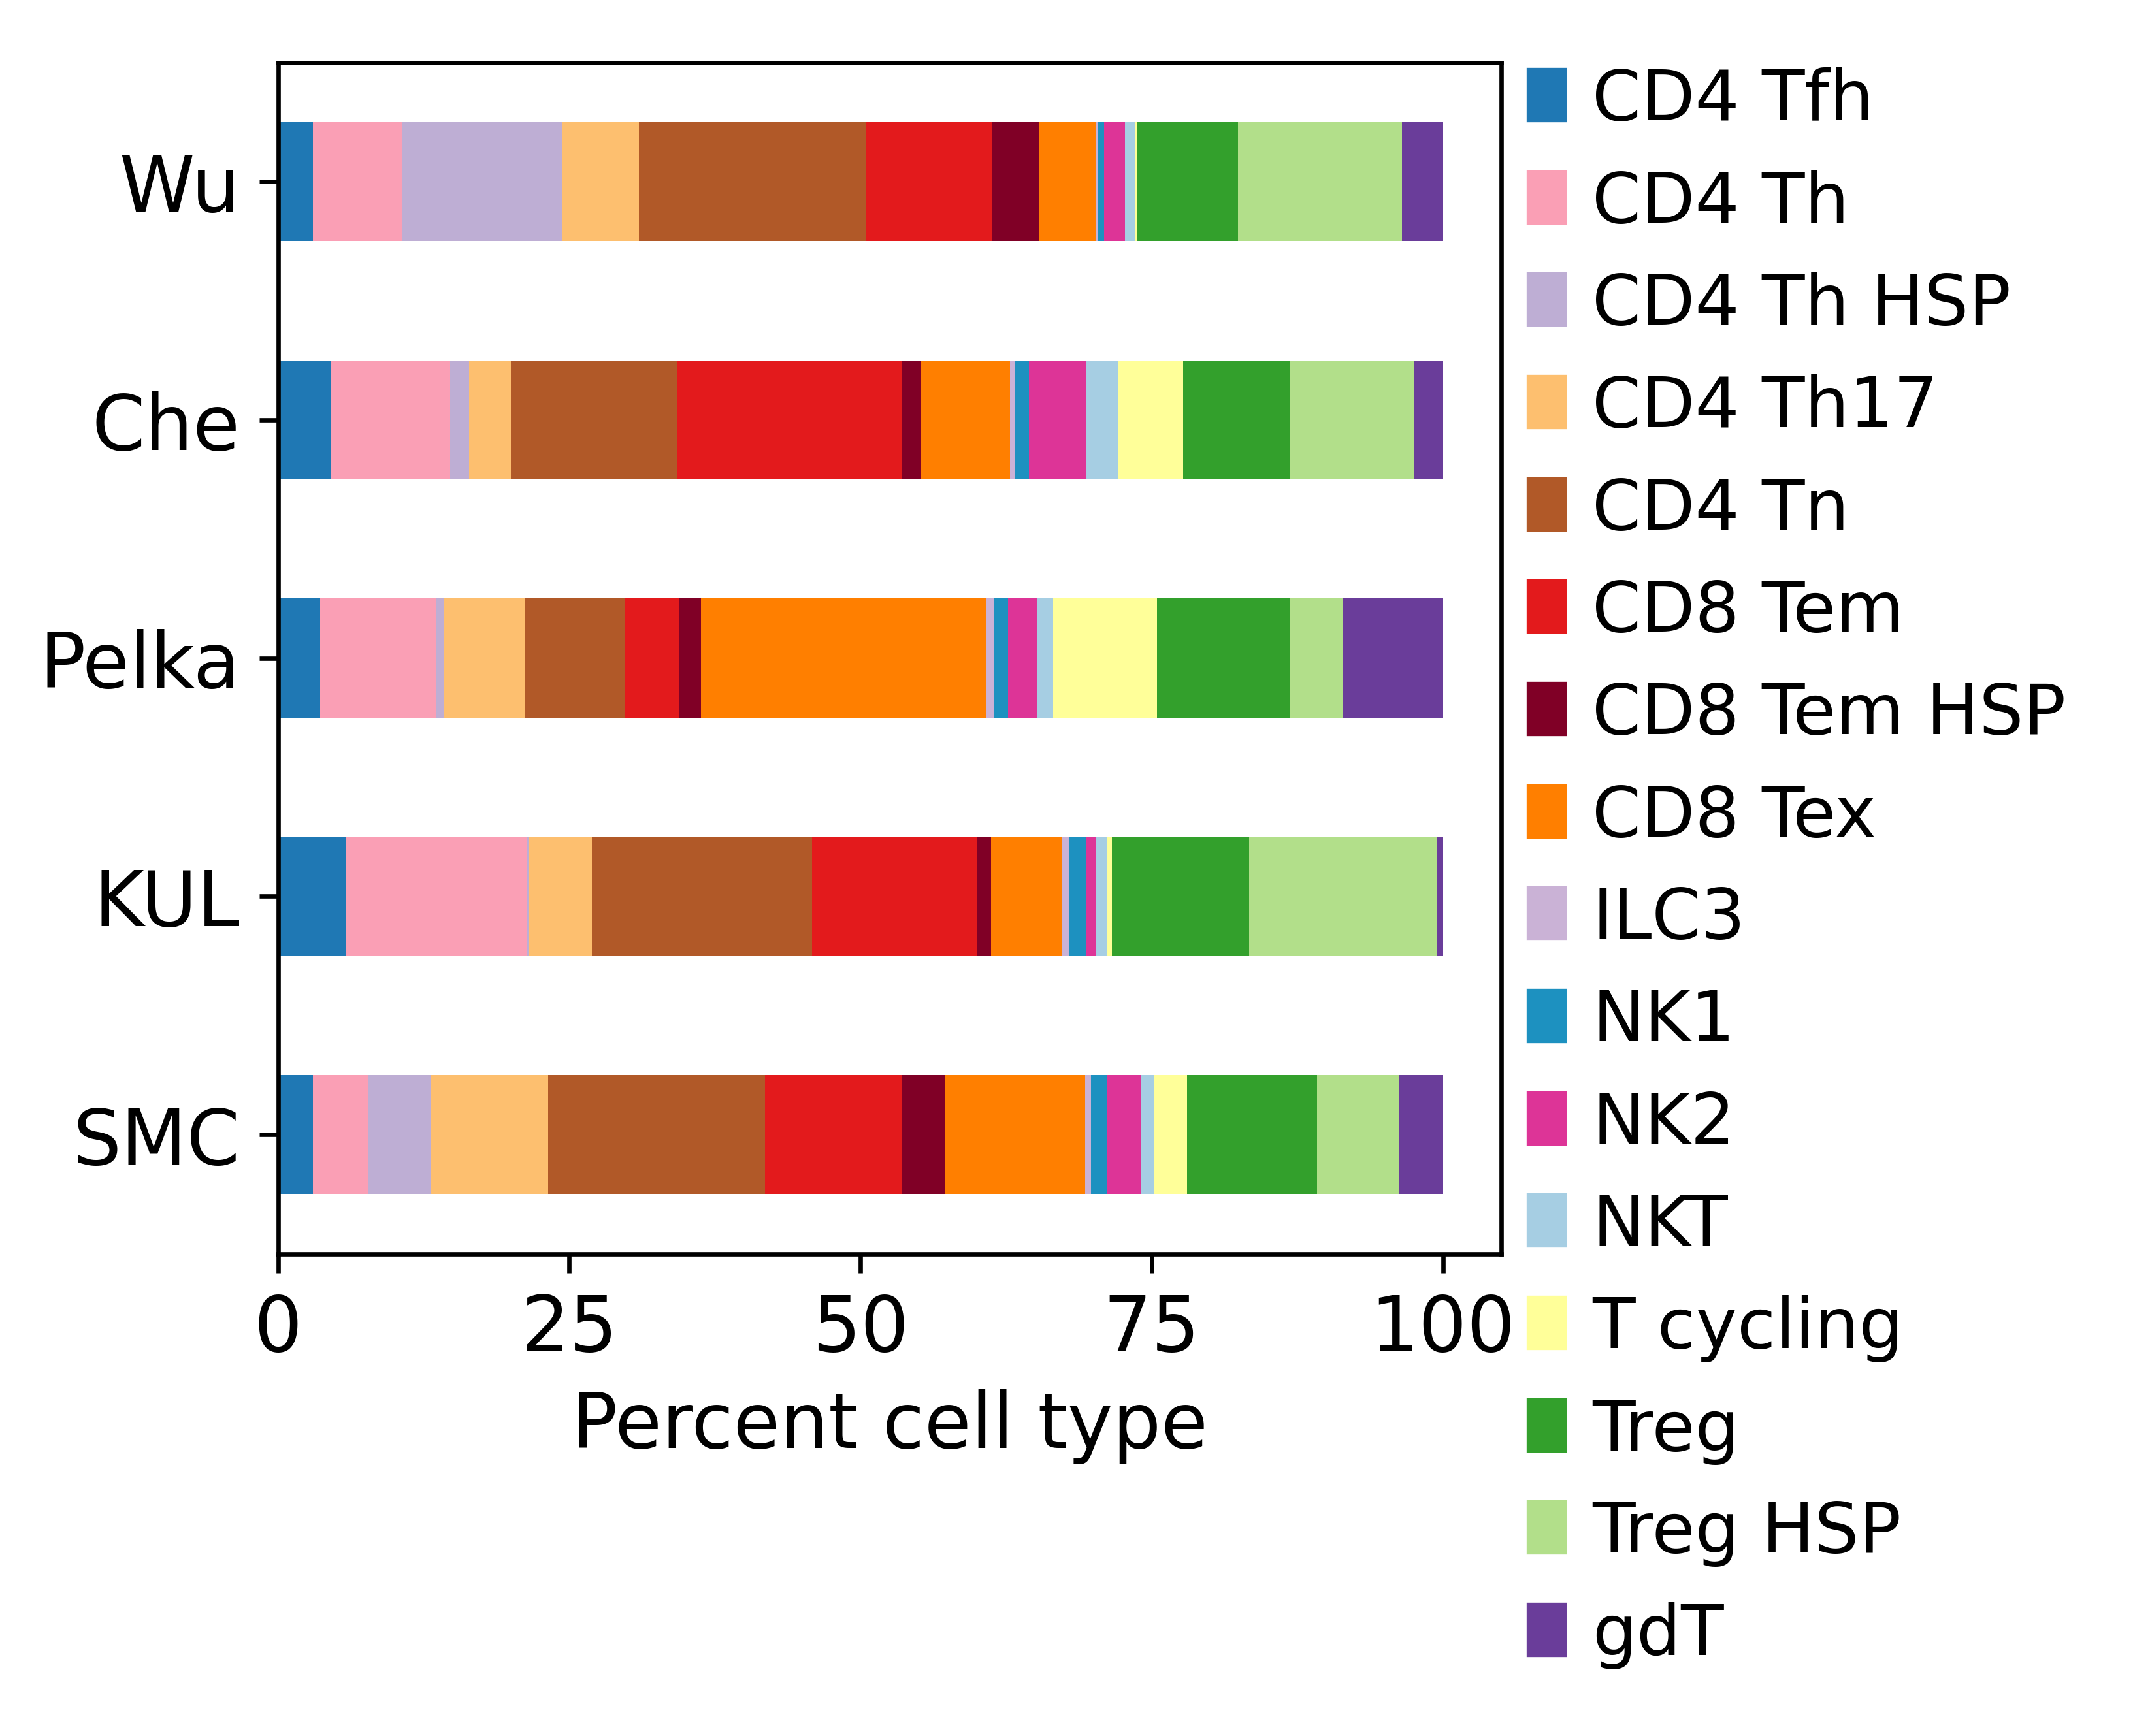

In [13]:
from collections import OrderedDict

color_dict = OrderedDict(
    zip(
        adata.obs["Annotation_scVI_detailed"].cat.categories.values.tolist(),
        adata.uns["Annotation_scVI_detailed_colors"],
    )
)

proportion_cells_patient(
    adata.obs,
    groupby_labels=["cell_source", "Annotation_scVI_detailed"],
    xlabel="Percent cell type",
    ylabel="",
    colors=color_dict,
    bbox_to_anchor=(1,1.02),
    figname="barplot_annotation_across_cell_source.pdf",
)

In [14]:
# todo dotplot with all cell types annotated
markers = {
    #"T": ["TRAC"],
    #"CD4": ["CD4"],
    "Th": ["IL7R", "CD40LG", "ANXA1"],
    "Tfh": ["ITM2A", "LPAR6", "PDCD1"],
    "Naïve CD4 T": ["CCR7", "SELL", "TCF7", "LEF1"],
    "Th17": ["IL17A", "ODF2L", "IL7R", "PDE4D"],
    "Treg": ["FOXP3", "CTLA4", "IL2RA"],
    "CD8": ["CD8A", "CD8B"],
    "Exhausted T": [
        "PDCD1",
        "LAG3",
        "HAVCR2",
        "CTLA4",
        "TIGIT",
        "ENTPD1",
    ],  # PD1: PCDC1, TIM3: HAVCR2,  CD39:ENTPD1 https://www.nature.com/articles/s41467-021-23324-4
    "Effector memory CD8": ["CCL4", "CCL5", "GZMK", "GZMB"],
    "gdT": ["TRDC", "TRGC1", "ITGA1", "KLRC2"], # KLRC2, TRDC, TRGC1, TRGC2
    "NKT": ["GZMA", "FGFBP2", "NKG7", "CD3G",], # "KLRB1"
    "NK": ["NCAM1", "FCER1G", "KLRC1"],
    "NK1": ["CD7", "KRT81", "KRT86", "XCL1", "XCL2", "GZMK", "CD160", "KLRB1", "CD27",],  # dNK2
    "NK2": ["GNLY", "GZMB", "GZMH", "KIR2DL1", "PRF1", "KIR3DL2", "HAVCR2"],  # dNK1
    #"ILC": ["AREG", "TLE1", "IL4I1"],
    "ILC3": ["IL4I1", "SPINK2", "KLRB1", "IL7R"], # "RORC", "TNFRSF25"
    "Cycling": ["MKI67"],
}

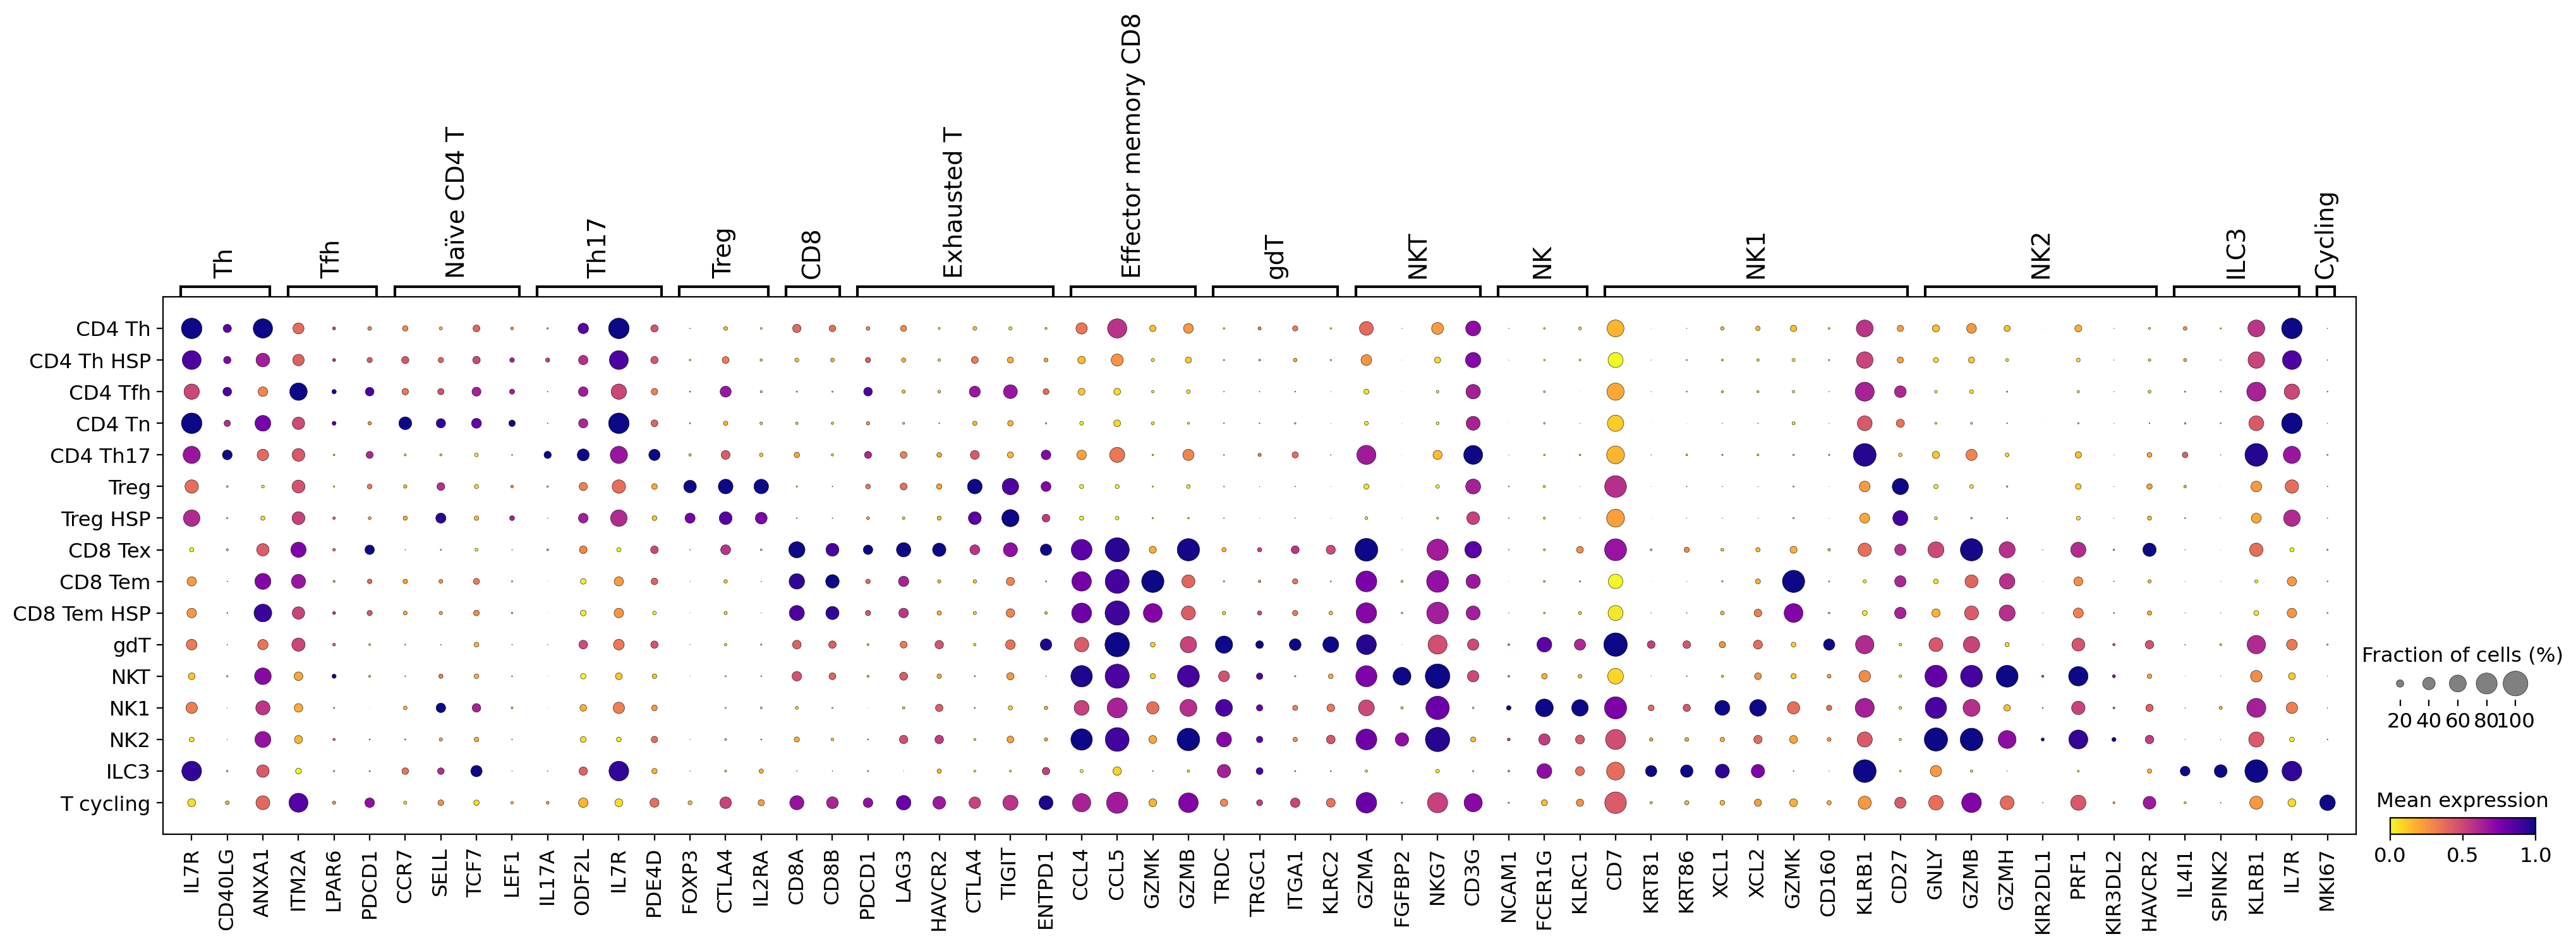

In [15]:
sc.pl.dotplot(
    adata,
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers,
    categories_order = [
        "CD4 Th",
        "CD4 Th HSP",
        "CD4 Tfh",
        "CD4 Tn",
        "CD4 Th17",
        "Treg",
        "Treg HSP",
        "CD8 Tex",
        "CD8 Tem",
        "CD8 Tem HSP",
        "gdT",
        "NKT",
        "NK1",
        "NK2",
        "ILC3",
        "T cycling"
    ],
    
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title="Fraction of cells (%)",
    dendrogram=False,
    save="TNKILC_dotplot_mean_general_annotations.pdf",
    show=True,
)

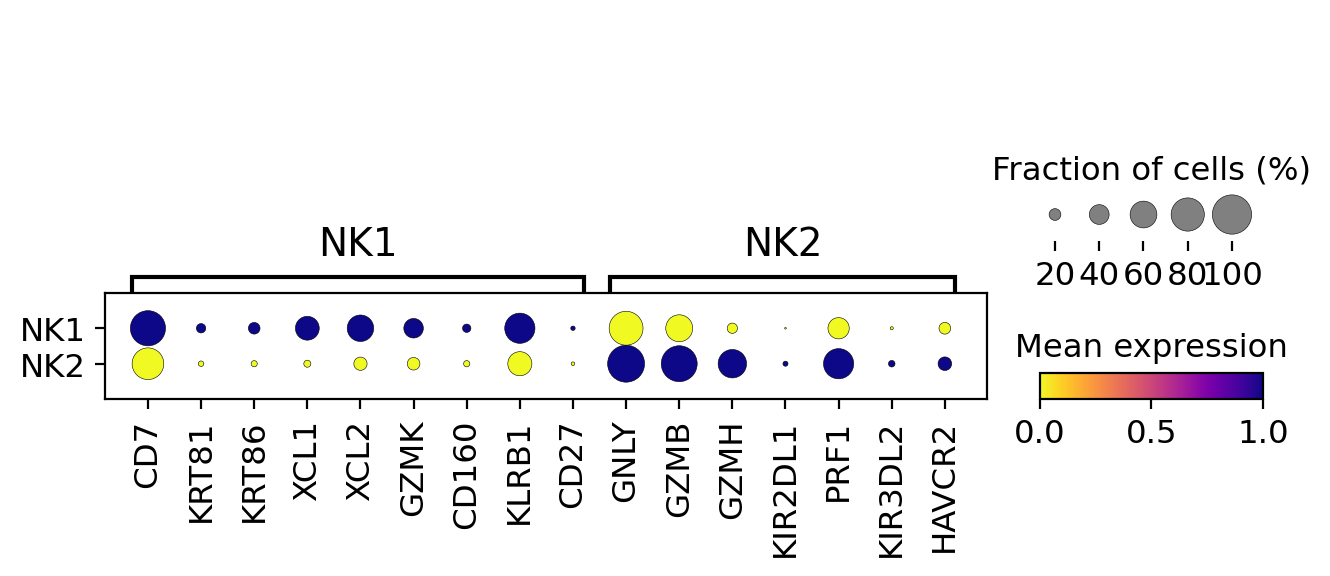

In [16]:
markers_nk_selected = {
    "NK1": [
        "CD7",
        "KRT81",
        "KRT86",
        "XCL1",
        "XCL2",
        "GZMK",
        "CD160",
        "KLRB1",
        "CD27",
    ],  # dNK2
    "NK2": ["GNLY", "GZMB", "GZMH", "KIR2DL1", "PRF1", "KIR3DL2", "HAVCR2"],  # dNK1
}

sc.pl.dotplot(
    adata[
        adata.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_nk_selected,  # plot NK cell clusters only
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title="Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_mean_selected_markers.pdf",
    show=True,
)

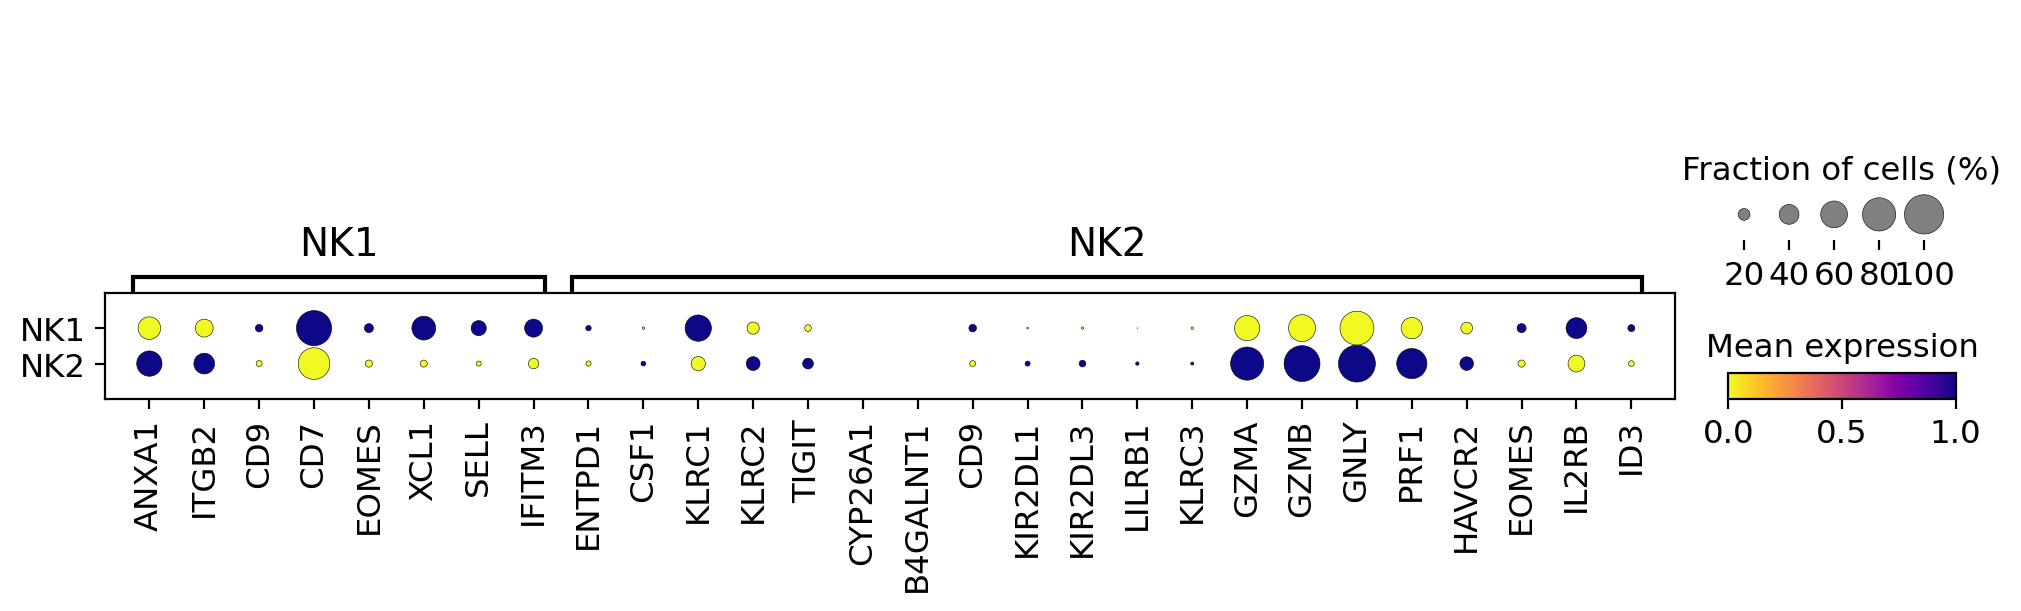

In [17]:
markers_nk = {
    "NK1": ["ANXA1", "ITGB2", "CD9", "CD7", "EOMES", "XCL1", "SELL", "IFITM3"],  # dNK2
    "NK2": [
        "ENTPD1",
        "CSF1",
        "KLRC1",
        "KLRC2",
        "TIGIT",
        "CYP26A1",
        "B4GALNT1",
        "CD9",
        "KIR2DL1",
        "KIR2DL3",
        "LILRB1",
        "KLRC3",
        "GZMA",
        "GZMB",
        "GNLY",
        "PRF1",
        "HAVCR2",
        "EOMES",
        "IL2RB",
        "ID3",
    ],  # dNK1
}

sc.pl.dotplot(
    adata[
        adata.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    use_raw=True,
    var_names=markers_nk,  # plot NK cell clusters only
    cmap="plasma_r",
    standard_scale="var",
    vmin=0,
    vmax=1,
    colorbar_title="Mean expression",
    size_title="Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_mean_all_markers.pdf",
    show=True,
)

### zscore 

In [18]:
adata_zscore = adata.raw.to_adata().copy()
# scale and store results in layer for later plotting
adata_zscore.layers['scaled'] = sc.pp.scale(adata_zscore, copy=True).X
adata_zscore.obs=adata.obs

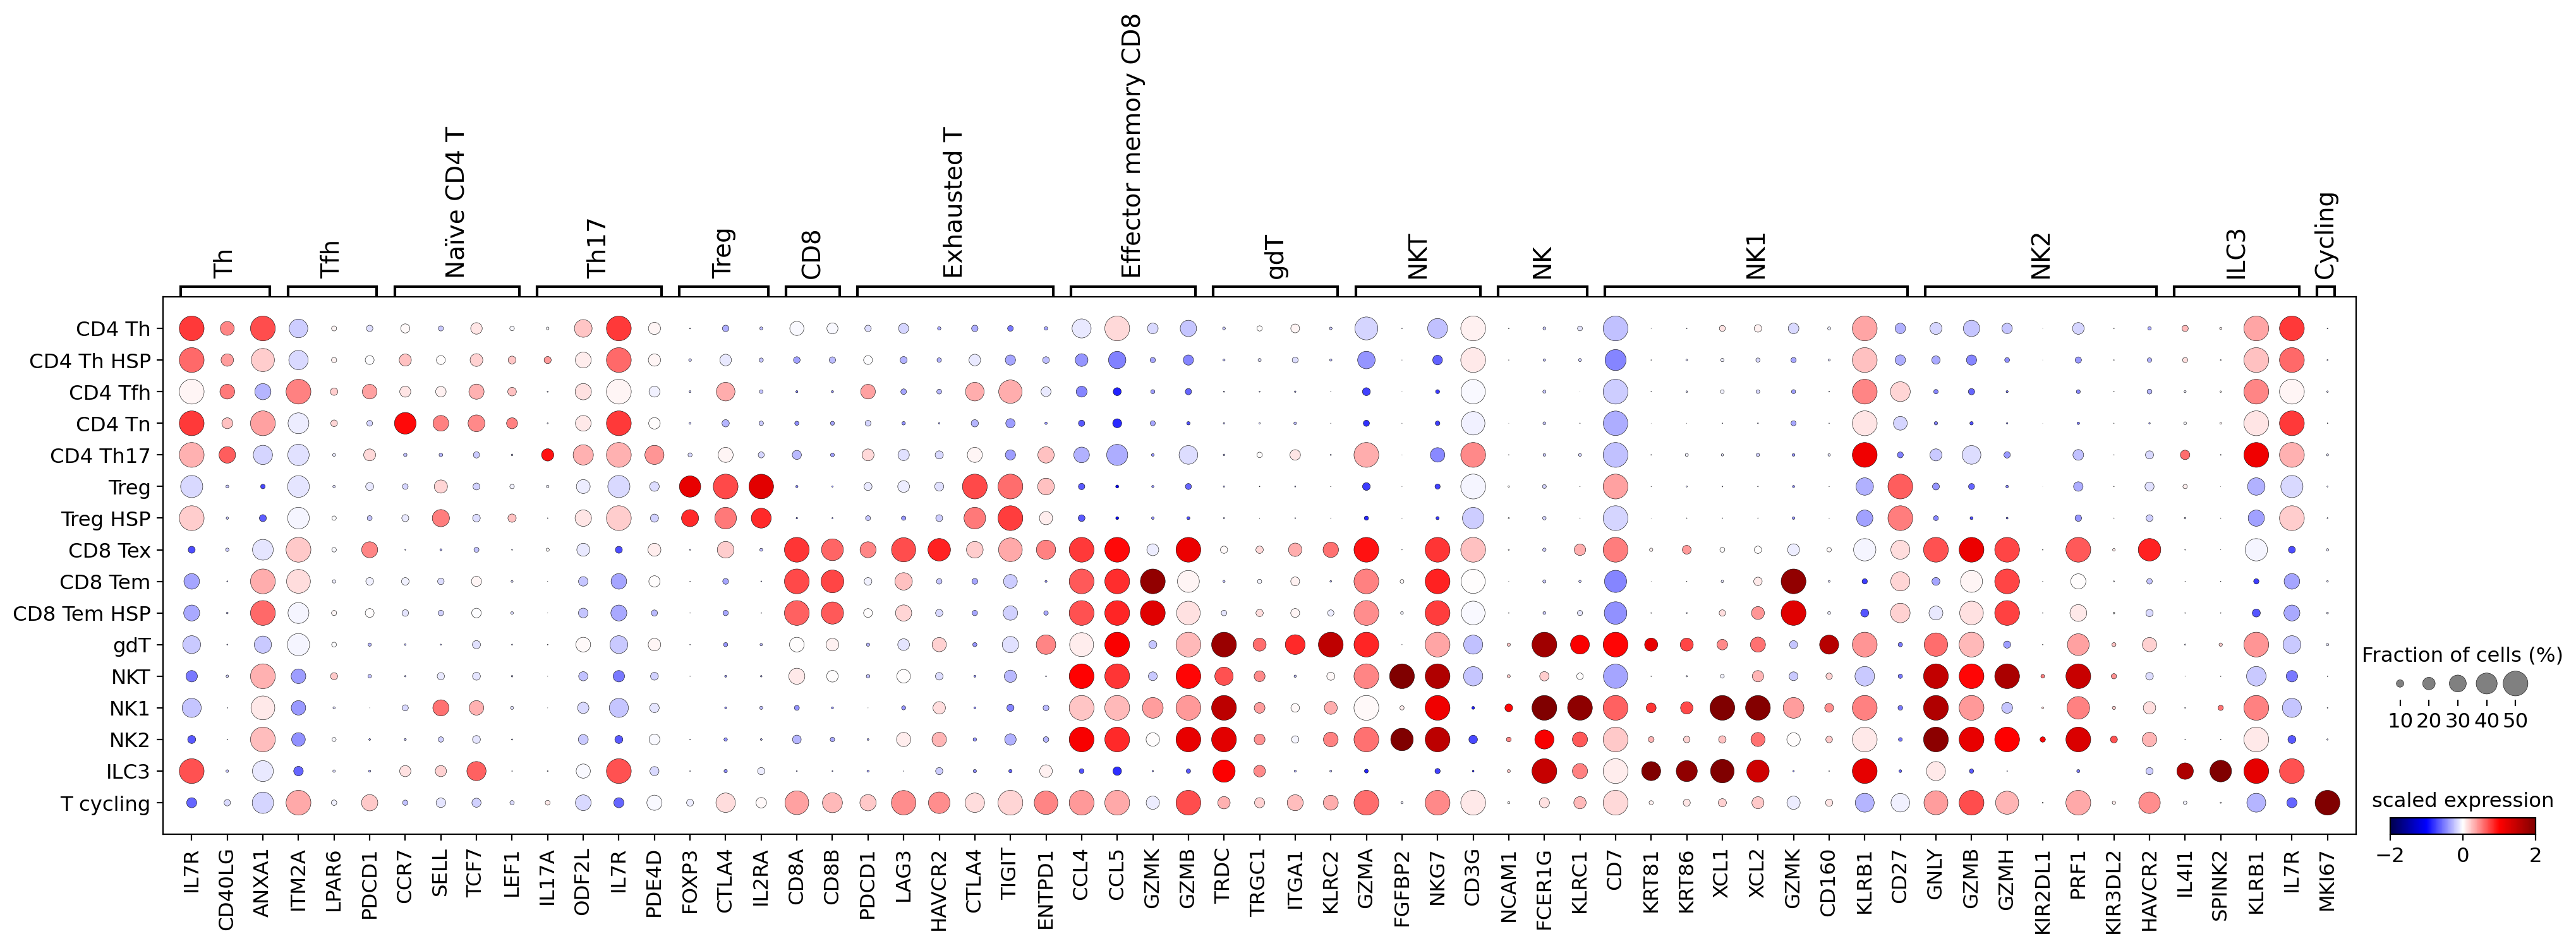

In [19]:
sc.pl.dotplot(adata=adata_zscore, 
              var_names=markers,
                  categories_order = [
        "CD4 Th",
        "CD4 Th HSP",
        "CD4 Tfh",
        "CD4 Tn",
        "CD4 Th17",
        "Treg",
        "Treg HSP",
        "CD8 Tex",
        "CD8 Tem",
        "CD8 Tem HSP",
        "gdT",
        "NKT",
        "NK1",
        "NK2",
        "ILC3",
        "T cycling"
    ],
              groupby="Annotation_scVI_detailed",
              cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.5, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
              save='zscore_general.pdf')

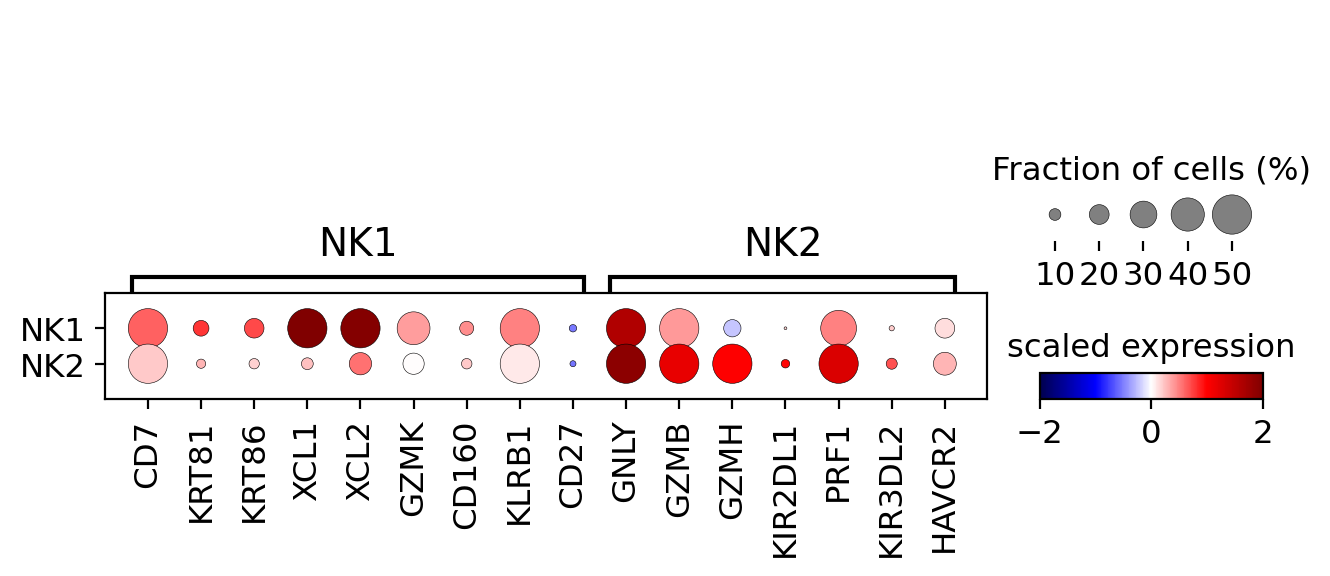

In [20]:
sc.pl.dotplot(
    adata_zscore[
        adata_zscore.obs.Annotation_scVI_detailed.str.contains("NK1|NK2")
    ],  # only NK cluster, to plot NK cell clusters only 
    groupby="Annotation_scVI_detailed",
    var_names=markers_nk_selected,  # plot NK cell clusters only markers_nk_selected
   cmap="seismic", 
              layer="scaled", 
              vmin=-2,
              vmax=2, 
              dot_max=0.5, 
              colorbar_title = "scaled expression", 
              size_title="Fraction of cells (%)",
    dendrogram=False,
    save="NK_dotplot_zscore.pdf",
    show=True,
)